# Perkenalan

Nama : Kevin Giovanni Pradana
Batch : 007

data csv dapat diunduh data[ disini](https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma)

dataset diatas merupakan data rideshare lyft dan uber didaerah kota Boston

Tujuan : Ingin mengimplementasikan regresi linear kedalam dataset untuk memprediksi harga taksi online, dengan mempertimbangkan beberapa feature dan mengevaluasi hasilnya

In [1]:
#!pip install feature-engine

# Import Pustaka

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for regression problems
from sklearn.linear_model import LinearRegression

#split dataset and standarize the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluate Regression Models
from sklearn.metrics import mean_squared_error

# Evaluate Classification Models
from sklearn.metrics import roc_auc_score

from feature_engine.outliers import Winsorizer

from sklearn import metrics
from sklearn.pipeline import Pipeline


fungsi library :

1. pandas : untuk manipulasi dataframe
2. numpy : untuk perhitungan dan manipulasi array
3. matplotlib dan seaborn : untuk visualisasi
4. linearregression : untuk training model liner regression
5. train_test_split : untuk memisahkan data train dan test
6. standardscaler : untuk scalling
7. winsorizer : digunakan untuk hadle outlier menggunakan censoring/capping
8. metrics : untuk menghitung akurasi dan metric seperti R2 square sebagai acuan performa model
9. pipeline : digunakan untuk proses scalling

# Data Loading

disini data di import setelah itu dilakukan copy() dengan tujuan untuk menghindari kerusakan data original

In [3]:
#import data 

data_rideshare_ori = pd.read_csv('rideshare_kaggle.csv')
data_rideshare = data_rideshare_ori.copy()
data_rideshare.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
#menampilkan kolom pada dataset
data_rideshare.keys()

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [5]:
#menampilkan info dataset
data_rideshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Didapatkan informasi sebagai berikut berdasarkan info dataset diatas :

* terdapat 57 features yang dapat diolah dengan total data 693070 baris
* berdasarkan info dataset terlihat ada missing value pada kolom **price** dan harus diketahui persentase missing values dan dilakukan data cleaning berdasarkan distribusi data nya apakah menggunakan mean atau median

In [6]:
#melihat shape dataset
data_rideshare.shape

(693071, 57)

# Data Cleaning

Saya asumsi yang ingin diprediksi dan dicari adalah predector hour dan price, maka beberapa column yang saya rasa tidak memiliki hubungan dengan dua predector tersebut akan saya drop dengan alasan berikut :

* id tidak bepengaruh terhadap feature hour dan price 
* timestamp terlalu sulit untuk dipahami
* feature yang berhubungan dengan suhu, cuaca dan kelembaban akan dihapus
* zona waktu didrop dengan alasan perbedaan zona waktu tetapi perjalanan tetap menggunakan satuan waktu biasa

In [7]:
#drop data yang tidak dibutuhkan 

data = data_rideshare.drop(columns=['id', 'timestamp', 'timezone', 'product_id', 
        'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'])

diatas merupakan semua feature yang terdapat di dataset yang akan di drop

In [8]:
#melihat missing values
data.isnull().sum()

hour               0
day                0
month              0
datetime           0
source             0
destination        0
cab_type           0
name               0
price          55095
distance           0
dtype: int64

terdapat lebih dari 55000 missing values yang terdapat pada feature price

In [9]:
#melihat persentase missing values
data.isnull().mean()

hour           0.000000
day            0.000000
month          0.000000
datetime       0.000000
source         0.000000
destination    0.000000
cab_type       0.000000
name           0.000000
price          0.079494
distance       0.000000
dtype: float64

terlihat bahwa perkiraan persentase missing values cukup kecil di angka 0,07

In [10]:
#menampilkan nilai missing values kedalam bentuk persen
print('Percent of missing "price" records is %.2f%%' %((data['price'].isnull().sum()/data.shape[0])*100))

Percent of missing "price" records is 7.95%


data missing values pada feature price memiliki persentase yang cukup kecil, karena itu maka data tersebut dapat di drop dengan asumsi jika menggunakan imputation dapat mengacaukan harga tiap rideshare

In [11]:
# drop data dengan missing values dengan parameter axis = 0 untuk baris
data = data.dropna( axis=0)

In [12]:
#copy dataset yang sudah bersih
data_rs = data.copy()

In [13]:
#check ulang missing values
data_rs.isnull().sum()

hour           0
day            0
month          0
datetime       0
source         0
destination    0
cab_type       0
name           0
price          0
distance       0
dtype: int64

In [14]:
#merubah tipe data datetime dari object menjadi datetime
data_rs['datetime'] = pd.to_datetime(data_rs['datetime'])

<AxesSubplot:>

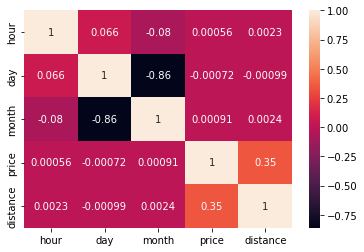

In [15]:
#melakukan pengecekan terhadap korelasi antar feature dengan label
correlations = data_rs.corr()
sns.heatmap(correlations, annot=True)

In [16]:
data_rs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   hour         637976 non-null  int64         
 1   day          637976 non-null  int64         
 2   month        637976 non-null  int64         
 3   datetime     637976 non-null  datetime64[ns]
 4   source       637976 non-null  object        
 5   destination  637976 non-null  object        
 6   cab_type     637976 non-null  object        
 7   name         637976 non-null  object        
 8   price        637976 non-null  float64       
 9   distance     637976 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 53.5+ MB


sudah tidak terdapat missing values pada dataset

In [17]:
data_rs.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44


# Eksplorasi Data

Terdapat dua jenis data, diantaranya :

* **numerikal**, merupakan data yang berbentuk angka dan bersifat seperti angka serta memiliki tipe data float maupun integer
* **kategorikal**, merupakan data yang berbentuk text dengan tipe data object atau bisa disebut string

### Data Kategorikal

## Data Grouping

### Data Kategorikal

In [18]:
#mendefiniskan data kategorikal
cat_data = data_rs.select_dtypes('object')

In [19]:
#melihat data kategorikal
cat_data.head()

,source,destination,cab_type,name
0,Haymarket Square,North Station,Lyft,Shared
1,Haymarket Square,North Station,Lyft,Lux
2,Haymarket Square,North Station,Lyft,Lyft
3,Haymarket Square,North Station,Lyft,Lux Black XL
4,Haymarket Square,North Station,Lyft,Lyft XL


data kategorikal yang digunakan kali ini ada :
* source : tempat jemput pengemudi
* destination : tempat tujuan pengantaran
* cab_type : tipe taxi / tipe layanan
* name : nama tipe mobil 

### Data Numerikal

In [20]:
#mendefinisikan data numerikal
num_data = data_rs.select_dtypes('number')

In [21]:
#menampilkan data numerikal
num_data

,hour,day,month,price,distance
0,9,16,12,5.0,0.44
1,2,27,11,11.0,0.44
2,1,28,11,7.0,0.44
3,4,30,11,26.0,0.44
4,3,29,11,9.0,0.44
...,...,...,...,...,...
693065,23,1,12,9.5,1.00
693066,23,1,12,13.0,1.00
693067,23,1,12,9.5,1.00
693069,23,1,12,27.0,1.00


C:\Users\DATA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

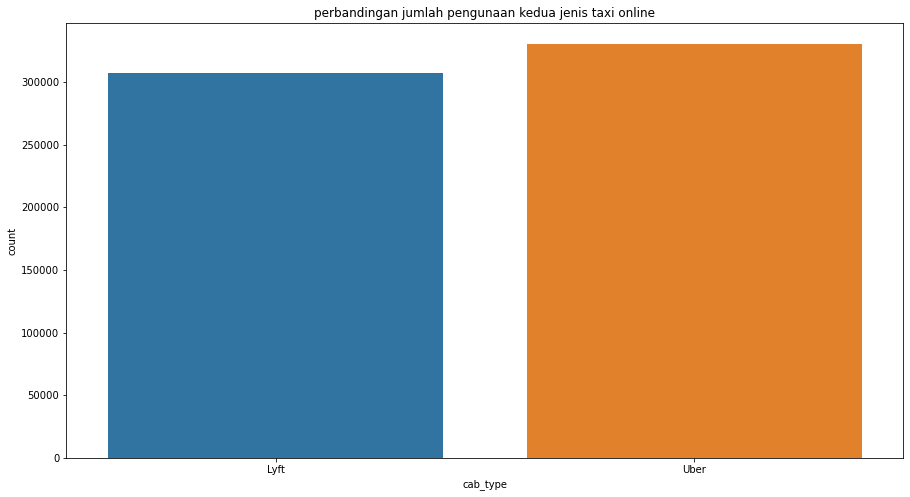

In [22]:
#melihat perbandingan jumlah ride tiap layanan
plt.figure(figsize=(15,8))
plt.title('perbandingan jumlah pengunaan kedua jenis taxi online')
sns.countplot(data_rs['cab_type'])
data_rs['cab_type'].value_counts()

terlihat bahwa uber sedikit lebih diminati dibandingkan dengan lyft, berdasarkan total jumlah data keseluruhan dan kemungkinan karena uber lebih dulu muncul dibanding lyft

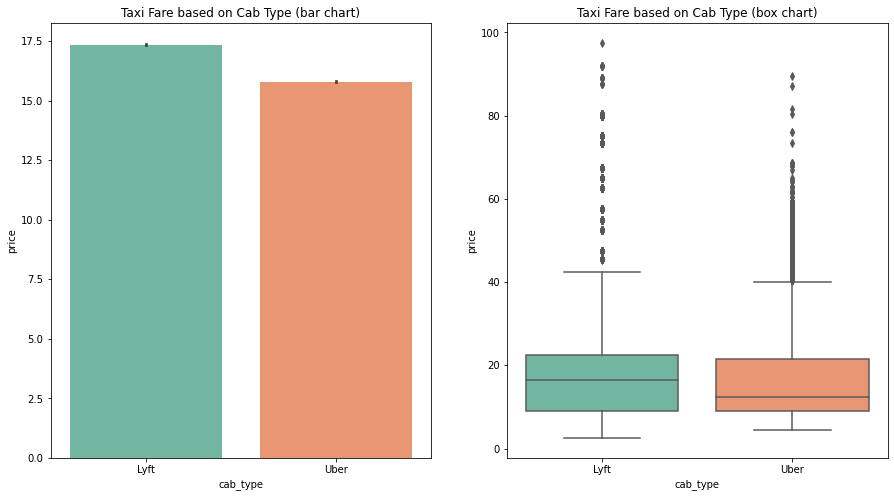

In [23]:
plt.figure(figsize=(15,8))


plt.subplot(1,2,1)
plt.title('Taxi Fare based on Cab Type (bar chart)')
sns.barplot(x="cab_type", y="price", data=data_rs, palette='Set2')

plt.subplot(1,2,2)
plt.title('Taxi Fare based on Cab Type (box chart)')
sns.boxplot(x="cab_type", y="price", data=data_rs, palette='Set2')

plt.show()


jika dibandingkan harga terhadap jenis taxi online, dapat dilihat pada barplot dikiri dan nilai median dikanan (garis ditengah box) bahwa lyft mengungguli uber secara harga, selanjutnya kita dapat melihat harga berdasarkan destinasi tujuan 

<AxesSubplot:title={'center':'Taxi Fare based on Product ID (box chart)'}, xlabel='price', ylabel='destination'>

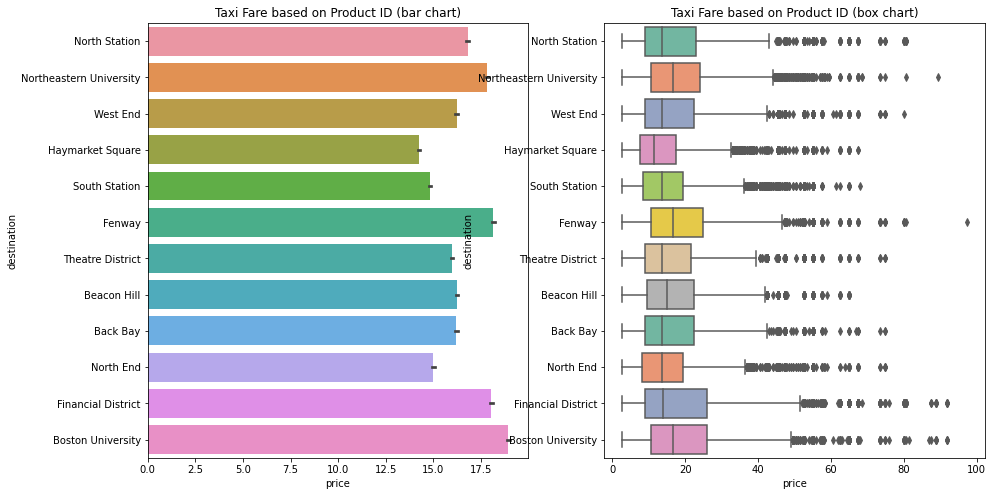

In [24]:
df_name = data_rs.groupby('destination')[['price']].mean().reset_index()
plt.figure(figsize=(15,8))



plt.subplot(1,2,1)
plt.title('Taxi Fare based on Product ID (bar chart)')
sns.barplot(x="price", y="destination", data=data_rs)

plt.subplot(1,2,2)
plt.title('Taxi Fare based on Product ID (box chart)')
sns.boxplot(x="price", y="destination", data=data_rs, palette="Set2" )

C:\Users\DATA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='destination', ylabel='count'>

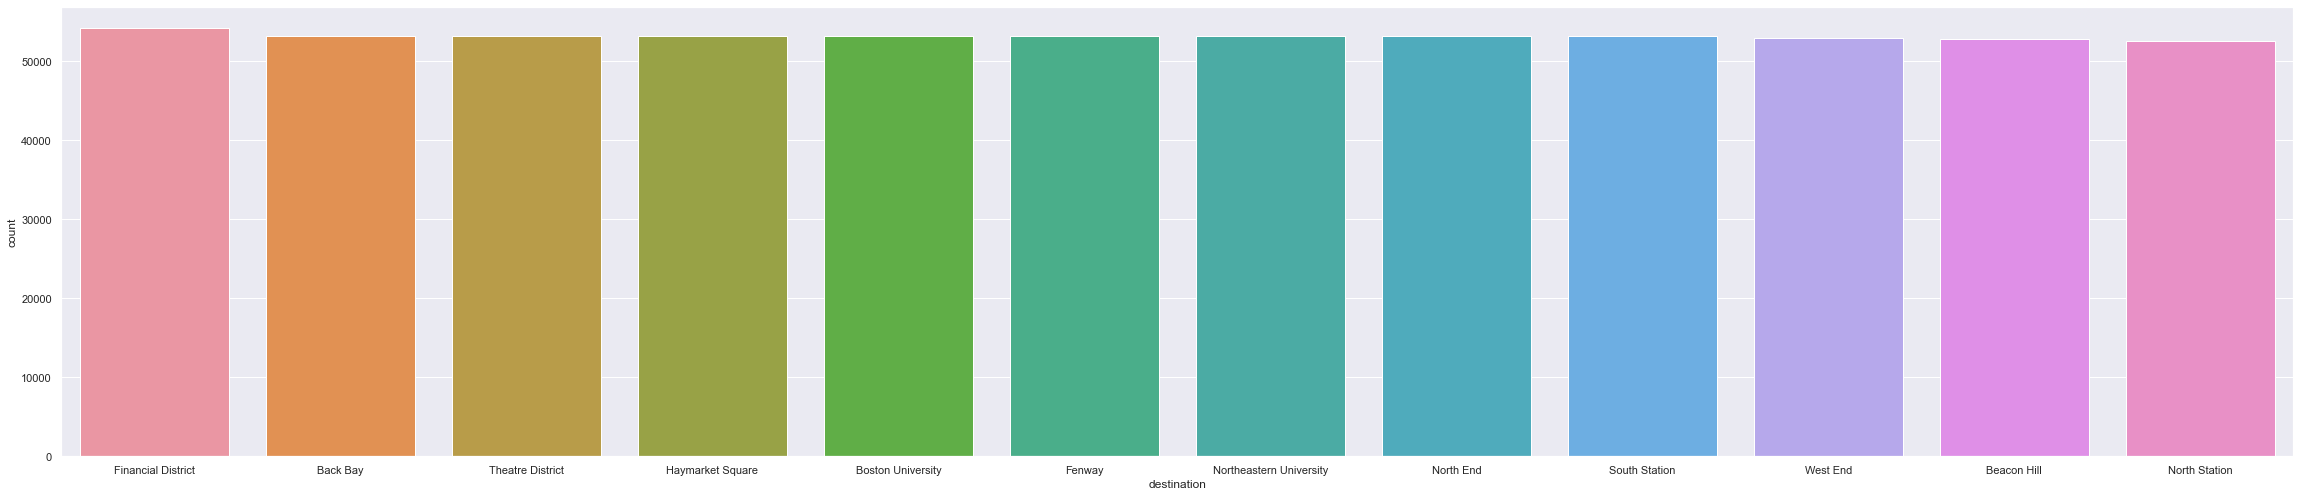

In [25]:
#melihat tujuan terbanyak
sns.set(rc={'figure.figsize':(40,8.27)})
sns.countplot(cat_data['destination'], order = cat_data['destination'].value_counts().index)


financial district dapat dinyatakan sebagai tujuan paling sering dituju untuk para pengguna taksi online dengan rideshare paling besar diikuti oleh back bay diurutan kedua dan theathre district di urutan ketiga

C:\Users\DATA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='source', ylabel='count'>

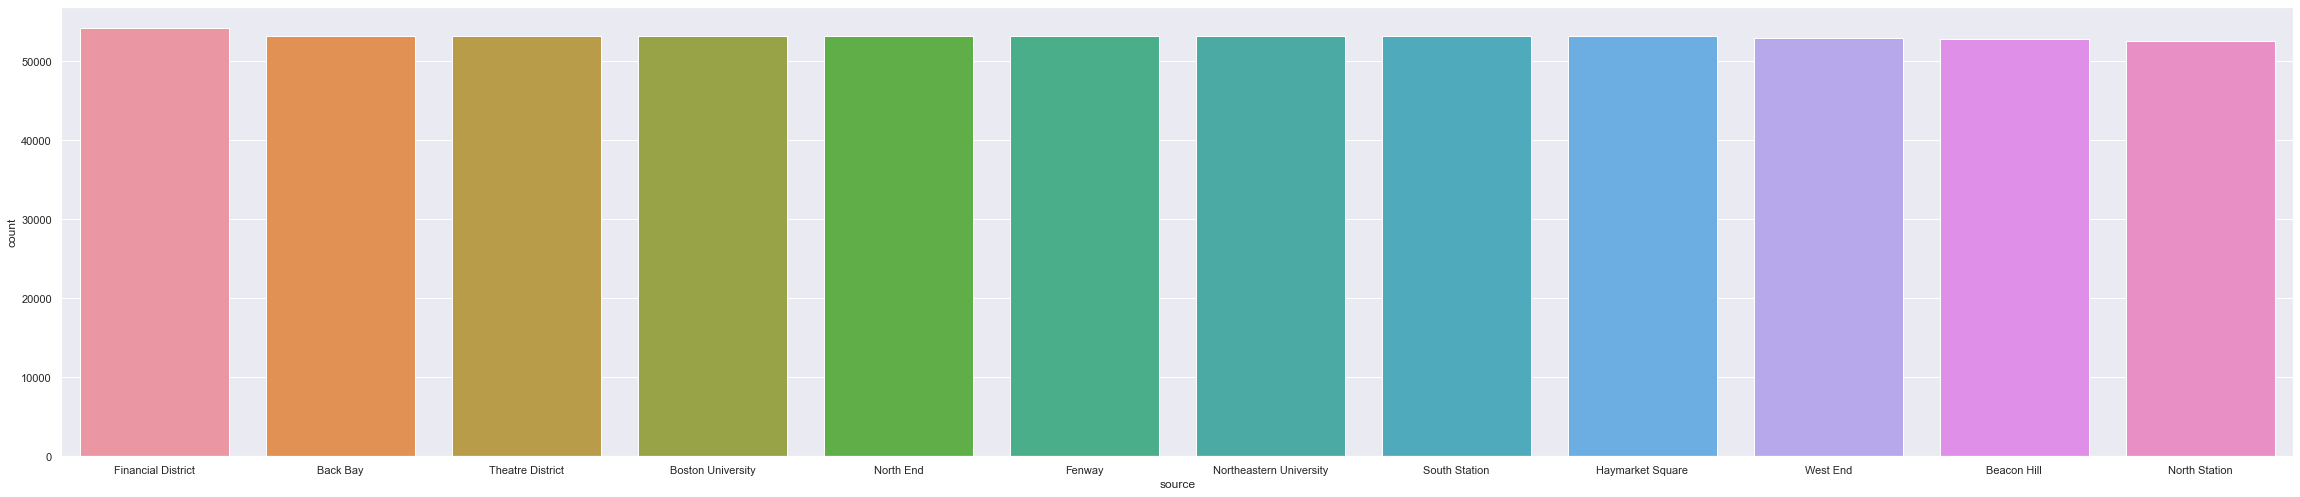

In [26]:
#melihat tempat antar
sns.set(rc={'figure.figsize':(40,8.27)})
sns.countplot( cat_data['source'], order =cat_data['source'].value_counts().index)

financial district dapat dinyatakan sebagai tempat jemput terbanyak untuk para pengguna taksi online dengan rideshare paling besar diikuti oleh back bay diurutan kedua dan theatre district di urutan ketiga

<AxesSubplot:xlabel='cab_type', ylabel='price'>

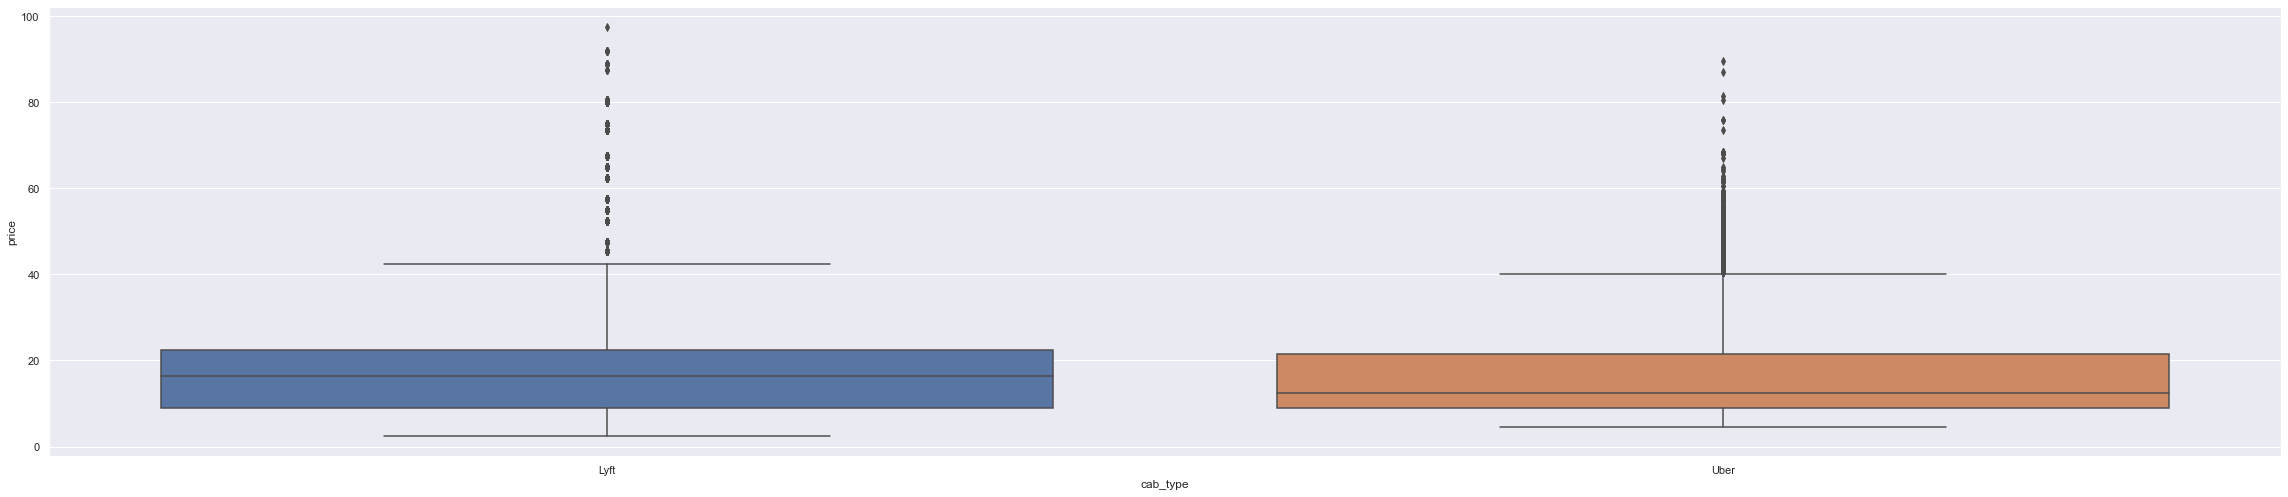

In [27]:
#cek distribusi data terhadap feature cab_type
sns.boxplot(x=data_rs['cab_type'], y=data_rs['price'])

C:\Users\DATA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Busiest hour '}, xlabel='hour', ylabel='count'>

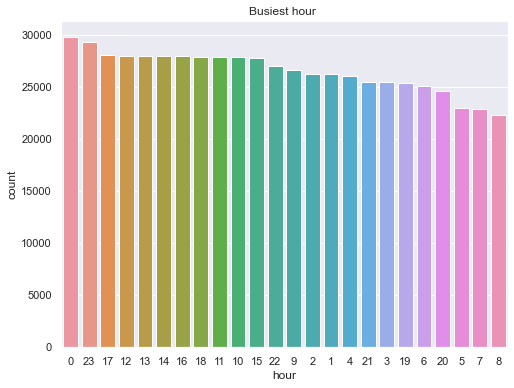

In [28]:
# melihat jam tersibuk uber dan lyft
plt.figure(figsize=(8, 6))
plt.title('Busiest hour ')
sns.countplot(data_rs['hour'], order =data_rs['hour'].value_counts().index)

jika pertanyaannya kapan waktu tersibuk taxi online beroperasi? 

jawabannya berdasarkan visualisasi data diatas didapatkan jam ke 0 dengan asumsi jam 12 malam merupakan tersibuk taxi online beroperasi, dengan kemungkinan taxi online mengantar orang pulang dari club malam maupun kencan

# Data Preprocessing

## Handle Outlier

### Censoring menghilangkan outlier

In [29]:
# function untuk persebaran data
def plot_dist_data(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram price')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot price')

    plt.show()

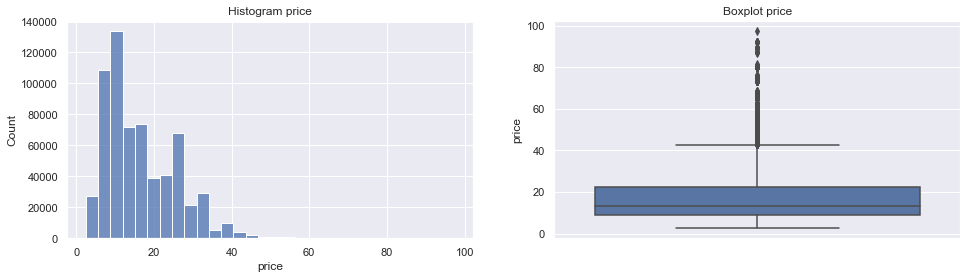

In [30]:
# cek distribusi data label

plot_dist_data(data_rs, 'price')


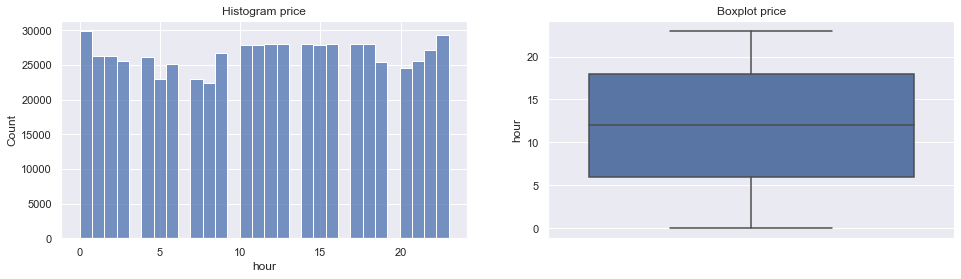

In [31]:
#cek distribusi data hour
plot_dist_data(data_rs, 'hour')

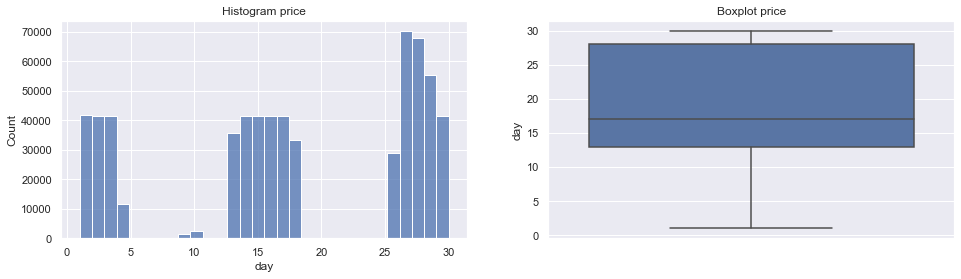

In [32]:
#cek distribusi data day
plot_dist_data(data_rs, 'day')


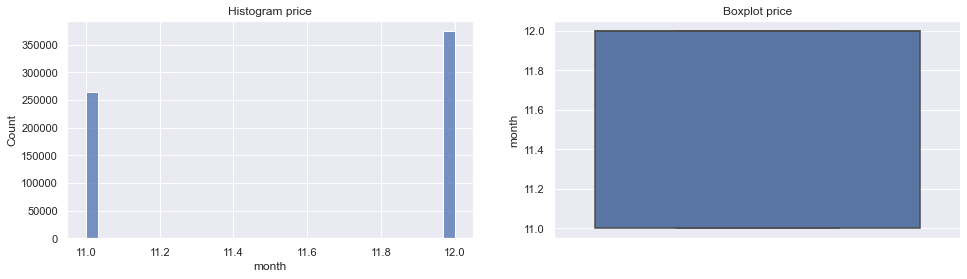

In [33]:
#cek distribusi data month
plot_dist_data(data_rs, 'month')

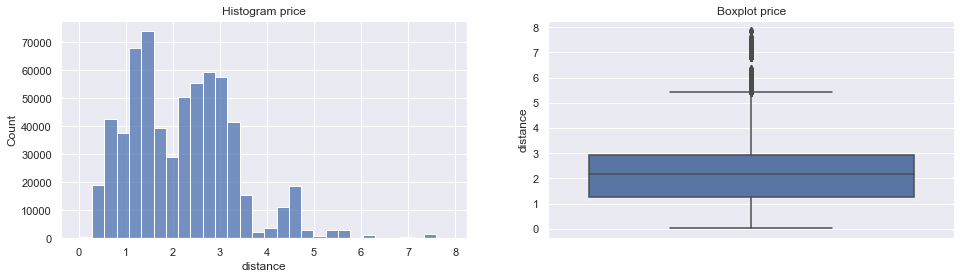

In [34]:
#cek distribusi data distance
plot_dist_data(data_rs, 'distance')

In [35]:
#menggunakan censoring untuk menghilangkan outlier
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                        tail='both', # cap left, right or both tails 
                        fold=1.5,
                        variables=['price', 'distance'])

In [36]:
windsoriser.fit(data_rs)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['price', 'distance'])

In [37]:
#melakukan capping terhadap data
ride_share_t = windsoriser.transform(data_rs)

In [38]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'price': -11.25, 'distance': -1.2200000000000002}
Right Tail Caps :  {'price': 42.75, 'distance': 5.42}


In [39]:
#memperlihatkan perbedaan feature price dan distance setelah capping
print('rideshare Dataframe - Before Capping')
print(data_rs.describe())
print('')
print('rideshare Dataframe - After Capping')
print(ride_share_t.describe())

rideshare Dataframe - Before Capping
                hour            day          month          price  \
count  637976.000000  637976.000000  637976.000000  637976.000000   
mean       11.618528      17.797674      11.586550      16.545125   
std         6.948776       9.982083       0.492452       9.324359   
min         0.000000       1.000000      11.000000       2.500000   
25%         6.000000      13.000000      11.000000       9.000000   
50%        12.000000      17.000000      12.000000      13.500000   
75%        18.000000      28.000000      12.000000      22.500000   
max        23.000000      30.000000      12.000000      97.500000   

            distance  
count  637976.000000  
mean        2.189261  
std         1.135413  
min         0.020000  
25%         1.270000  
50%         2.160000  
75%         2.930000  
max         7.860000  

rideshare Dataframe - After Capping
                hour            day          month          price  \
count  637976.000000  637976

terjadi perubahan statistik data pada feature price dan distance setelah melakukan censoring, sedangkan data feature lain tetap sama persis seperti sebelum censoring

price - Sebelum Capping


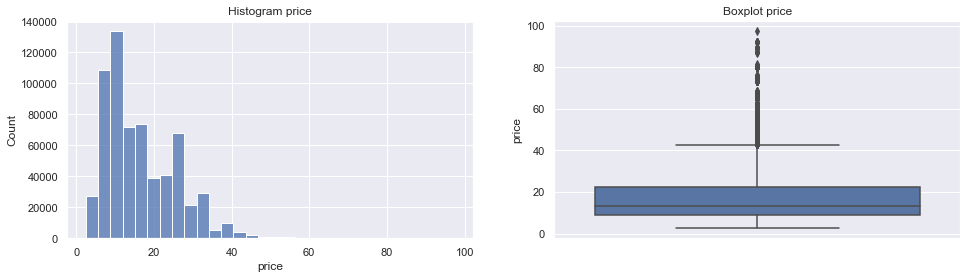


price - Setelah Capping


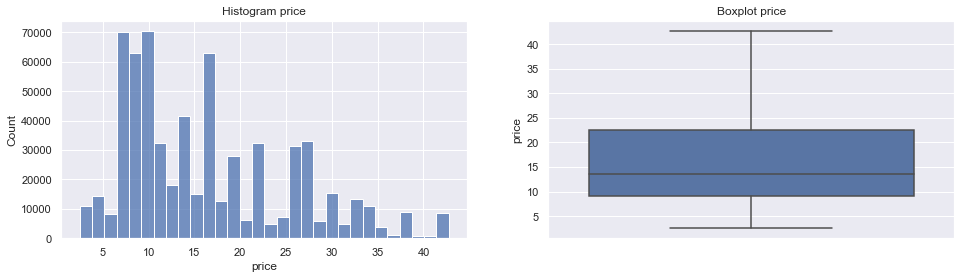


distance - Sebelum Capping


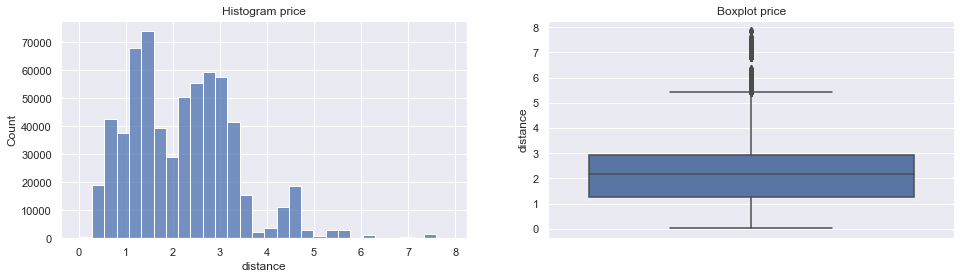


distance - Setelah Capping


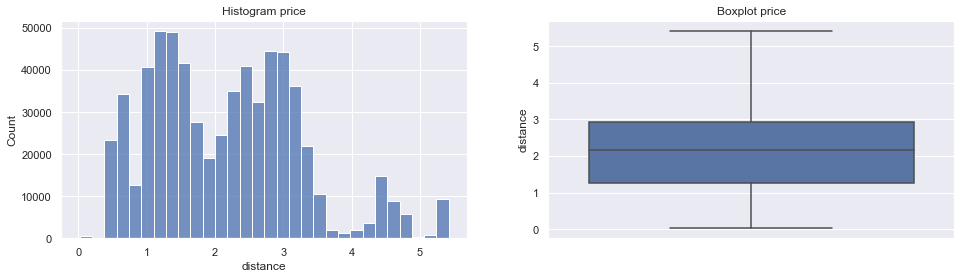

In [40]:
#visualisas data setelah capping dan sebelum capping untuk data numerikal
print('price - Sebelum Capping')
plot_dist_data(data_rs, 'price')
print('\nprice - Setelah Capping')
plot_dist_data(ride_share_t, 'price')

print('\ndistance - Sebelum Capping')
plot_dist_data(data_rs, 'distance')
print('\ndistance - Setelah Capping')
plot_dist_data(ride_share_t, 'distance')



terlihat berdasarkan visualisasi data sebelum censoring dan setelah censoring diatas, outlier pada dataset hilang tanpa menghilangkan jumlah data total dan secara gambar terlihat frekuensi data setelah censoring mengalami pengurangan frekuensi data dibandingkan dengan data asli nya

### Split feature (x) dan label (y)


untuk variabel X menyimpan data feature data numerik dan y menyimpan data label data numerik

In [41]:
#mendefinisikan data numerikal
num_col = ride_share_t.select_dtypes('number')

In [42]:
#melihat data numerikal
num_col

,hour,day,month,price,distance
0,9,16,12,5.0,0.44
1,2,27,11,11.0,0.44
2,1,28,11,7.0,0.44
3,4,30,11,26.0,0.44
4,3,29,11,9.0,0.44
...,...,...,...,...,...
693065,23,1,12,9.5,1.00
693066,23,1,12,13.0,1.00
693067,23,1,12,9.5,1.00
693069,23,1,12,27.0,1.00


In [43]:
#menghapus feature price 
feature_cols = num_col.drop(columns=['price'], axis=1).values
#mendefinisikan data y (label)
y = num_col['price'].values
#mendifinisikan data x (feature)
X = feature_cols

### Splitting Data

In [44]:
#membagi data menjadi 4 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


### Scalling

In [45]:
#melakukan scalling untuk data test dan train
pipeline = Pipeline([
    ('std_scalr', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [62]:
y_train_t = pd.DataFrame(y_train)

# Pendefinisian Model


In [46]:
#mendefinisikan linear regression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
#menampilkan nilai intercept
print("intercept:" , lin_reg.intercept_)

intercept: 16.487821256070365


In [48]:
#menampilkan coefficient 
print("coefficient :" ,lin_reg.coef_)

coefficient : [-0.00565926  0.01083691  0.01406297  3.13696993]


# Evaluasi Model

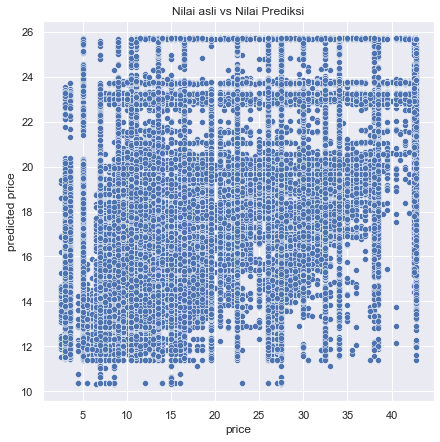

In [49]:
#membuat visualisasi persebaran data aktual dan data prediksi
pred = lin_reg.predict(X_test)

plt.figure(figsize=(7,7))
plt.title('Nilai asli vs Nilai Prediksi')
sns.scatterplot(x=y_test, y=pred)
plt.xlabel('price')
plt.ylabel('predicted price')
plt.show()

berdasarkan visualisasi sebaran data diatas, didapatkan data yang persebarannya kurang baik dan saling bertumpuk. kita dapat berkesimpulan bahwa regression linear kurang cocok untuk menangani dataset rideshare tanpa parameter cuaca, kelembaban, serta angin

In [50]:
#membuat dataframe perbandingan nilai asli dengan nilai prediksi beserta error
diff = pd.DataFrame({'True Values':y_test,
                     'Prediction' :pred,
                     'Error Values': (y_test - pred)
                    })
diff

,True Values,Prediction,Error Values
0,19.5,17.046369,2.453631
1,10.5,12.329976,-1.829976
2,5.0,18.698386,-13.698386
3,16.5,16.244648,0.255352
4,38.5,18.313026,20.186974
...,...,...,...
191388,16.0,18.373940,-2.373940
191389,9.0,15.614947,-6.614947
191390,42.5,22.418244,20.081756
191391,26.0,11.977579,14.022421


kita cek menggunakan metric lain diantaranya MAE (Mean Absolute Error) , MSE (Mean Squared Error), RMSE (Root Mean Squared Error), R2 Square 

MAE : rataan nilai absolut error

MSE : rataan nilai squared error

RMSE : akar dari dari rata-rata squared error


In [51]:
#function untuk menghasilkan nilai metric
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [52]:
#menampilkan nilai metric
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)




Test set evaluation:
_____________________________________
MAE: 7.007339241237314
MSE: 72.22863350848094
RMSE: 8.498743054621722
R2 Square 0.11936736394855452
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.020769108983647
MSE: 72.62389994233682
RMSE: 8.521965732290692
R2 Square 0.11933363771132954
__________________________________


Berdasarkan beberapa metric diatas, diambil satu metric yang menandakan apakah model yang digunakan baik apa tidak. nilai R2 Square diatas memiliki rentang 0 hingga 1 dan yang dapat kita lihat diatas untuk data test didapatkan nilai R2 Square yang cenderung mendekati 0 begitupun untuk data Train, hal tersebut mengartikan bahwa model tidak cocok atau kurang baik untuk prediksi 

# Model Inference

In [53]:
#membuat data dummy dengan nilai 0 hingga 2000 dan banyak baris 1000 
dummy = pd.DataFrame(np.random.randint(0,2000,size=(1000, 5)), columns=list('ABCDE'))
dummy

,A,B,C,D,E
0,1180,1443,1687,933,1045
1,1467,190,1498,1601,1937
2,1770,264,1906,1818,762
3,759,3,817,92,1792
4,1832,1371,883,449,707
...,...,...,...,...,...
995,345,208,90,1603,1636
996,175,1838,673,970,1514
997,1378,1901,410,1662,564
998,1167,428,946,1983,12


In [54]:
# Assign x and y value from dummy data
y_dum = dummy['E'].values # E = target column
X_dum = dummy.drop(columns=['E'],axis=1).values

In [55]:
# Data Scaling
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_dummy = pipeline.fit_transform(X_dum)



In [56]:
X_dummy.shape

(1000, 4)

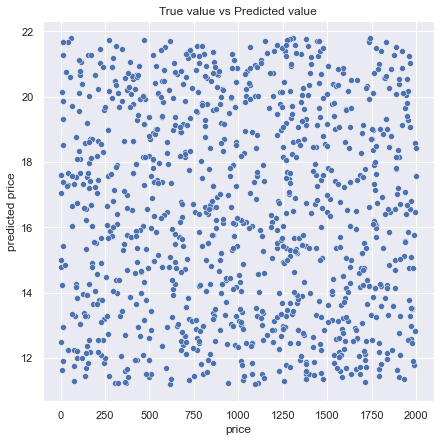

In [57]:
pred_dummy = lin_reg.predict(X_dummy)


plt.figure(figsize=(7,7))
plt.title('True value vs Predicted value')
sns.scatterplot(x=y_dum, y=pred_dummy)
plt.xlabel('price')
plt.ylabel('predicted price')
plt.show()

In [58]:
diff_dum = pd.DataFrame({'True Values':y_dum,
                     'Prediction' :pred_dummy,
                     'Error Values': (y_dum - pred_dummy)
                    })
diff_dum

,True Values,Prediction,Error Values
0,1045,16.160385,1028.839615
1,1937,19.665356,1917.334644
2,762,20.822125,741.177875
3,1792,11.665987,1780.334013
4,707,13.571756,693.428244
...,...,...,...
995,1636,19.653021,1616.346979
996,1514,16.348623,1497.651377
997,564,19.994154,544.005846
998,12,21.680973,-9.680973


dapat dilihat bahwa prediksi model dengan menggunakan data random menghasilkan gap antara prediksi dan data yang sebenarnya cukup jauh berbeda. mengapa demikian?, terlihat di kolom error values diatas didapat nilai error yang besar, seharusnya nilai error kecil jika model ingin dikatakan sebagai model yang cocok 

# Kesimpulan

Setelah melakukan eksplorasi data, diasumsikan price dipengaruhi terutama oleh jarak dan tujuan beserta waktu (hour), dengan melakukan plotting korelasi didapatkan beberapa feature yang cukup cocok, diantaranya :

1. cab_type
2. distance
3. destination

setelah itu dilakukan pemodelan regresi linear setelah dilakukan data preprocessing. setelah dilakukan prediksi terhadap dataset, didapat R2 square bernilai rendah cenderung mendekati 0, oleh karena itu disimpulkan dataset tidak cocok menggunakan model regresi linear, selain itu saat digunakan data random untuk prediksi menggunakan linear regression dapat dilihat persebaran data nya kurang begitu baik dan error yang didapatkan lumayan besar